In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score


In [2]:
from pandas import read_csv, unique

import numpy as np
import pandas as pd

from scipy.interpolate import interp1d
from scipy.stats import mode

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from tensorflow import stack
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
from keras.layers import Dense, GlobalAveragePooling1D, BatchNormalization, MaxPool1D, Reshape, Activation
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [3]:
names = ["NaN", "user_id", "activity", "timestamp", "x_axis", "y_axis", "z_axis"]
data = pd.read_csv("C:/Users/GACHON/Desktop/AiStudy/data/WISDM.csv", header=None, names=names, skiprows=1)

def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

df = data.drop('NaN', axis=1)
df["z_axis"] = df["z_axis"].replace(regex=True, to_replace=r';', value=r'')
    # ... and then this column must be transformed to float explicitly
df.dropna(axis=0, how='any', inplace=True)
df.head()
print(df.shape)

(1098203, 6)


In [4]:
df.head()

,user_id,activity,timestamp,x_axis,y_axis,z_axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098203 entries, 0 to 1098202
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user_id    1098203 non-null  int64  
 1   activity   1098203 non-null  object 
 2   timestamp  1098203 non-null  int64  
 3   x_axis     1098203 non-null  float64
 4   y_axis     1098203 non-null  float64
 5   z_axis     1098203 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 50.3+ MB


In [6]:
df = df[~df['activity'].str.contains('Jogging|Sitting|Upstairs|Downstairs')]

In [7]:
print(df['activity'].value_counts())

activity
Walking     424397
Standing     48395
Name: count, dtype: int64


In [8]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(df.drop('activity', axis=1), df['activity'])

In [9]:
df = pd.concat([pd.DataFrame(X_resampled, columns=df.drop('activity', axis=1).columns),
                         pd.DataFrame({'activity': y_resampled})], axis=1)

In [10]:
print(df['activity'].value_counts())

activity
Walking     424397
Standing    424397
Name: count, dtype: int64


In [11]:
df.head()

,user_id,timestamp,x_axis,y_axis,z_axis,activity
0,33,49394992294000,0.844462,8.008764,2.792171,Walking
1,33,49395102310000,1.116869,8.621680,3.786457,Walking
2,33,49395202316000,-0.503953,16.657684,1.307553,Walking
3,33,49395302292000,4.794363,10.760075,-1.184970,Walking
4,33,49395412338000,-0.040861,9.234595,-0.694638,Walking


In [12]:
mapping = {'Walking': 0, 'Standing': 1}

# 레이블 인코딩
df['ActivityEncoded'] = df['activity'].map(mapping)
df

,user_id,timestamp,x_axis,y_axis,z_axis,activity,ActivityEncoded
0,33,49394992294000,0.844462,8.008764,2.792171,Walking,0
1,33,49395102310000,1.116869,8.621680,3.786457,Walking,0
2,33,49395202316000,-0.503953,16.657684,1.307553,Walking,0
3,33,49395302292000,4.794363,10.760075,-1.184970,Walking,0
4,33,49395412338000,-0.040861,9.234595,-0.694638,Walking,0
...,...,...,...,...,...,...,...
848789,33,578988088089,0.035376,9.890000,1.460000,Standing,1
848790,35,104109115857,2.490000,9.378709,2.868709,Standing,1
848791,12,19327344520904,-3.310799,8.392679,-1.148552,Standing,1
848792,35,106743248192,2.539041,9.332378,2.862378,Standing,1


In [13]:
df.shape

(848794, 7)

C:\Users\GACHON\AppData\Local\Temp\ipykernel_5972\3249328716.py:2: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x = "user_id", hue="activity", data = df, palette = [sns.color_palette()[0]],
C:\Users\GACHON\anaconda3\envs\test01\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\GACHON\anaconda3\envs\test01\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


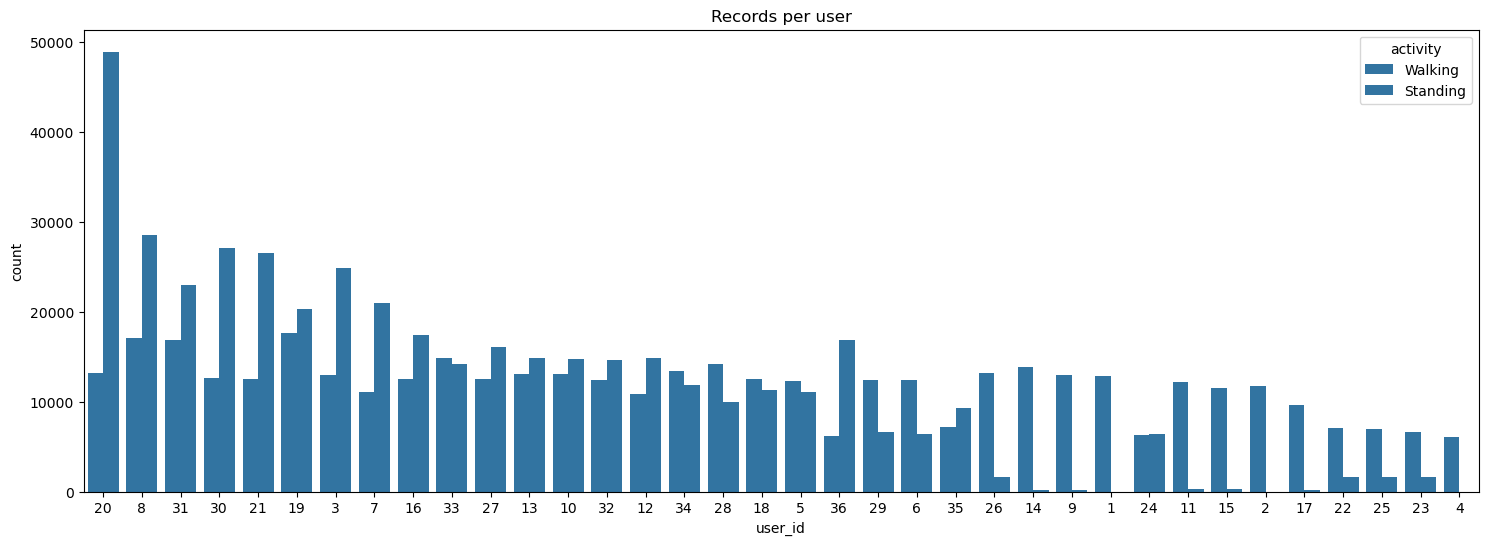

In [15]:
plt.figure(figsize=(18, 6))
sns.countplot(x = "user_id", hue="activity", data = df, palette = [sns.color_palette()[0]],
              order = df.user_id.value_counts().index)
plt.title("Records per user");

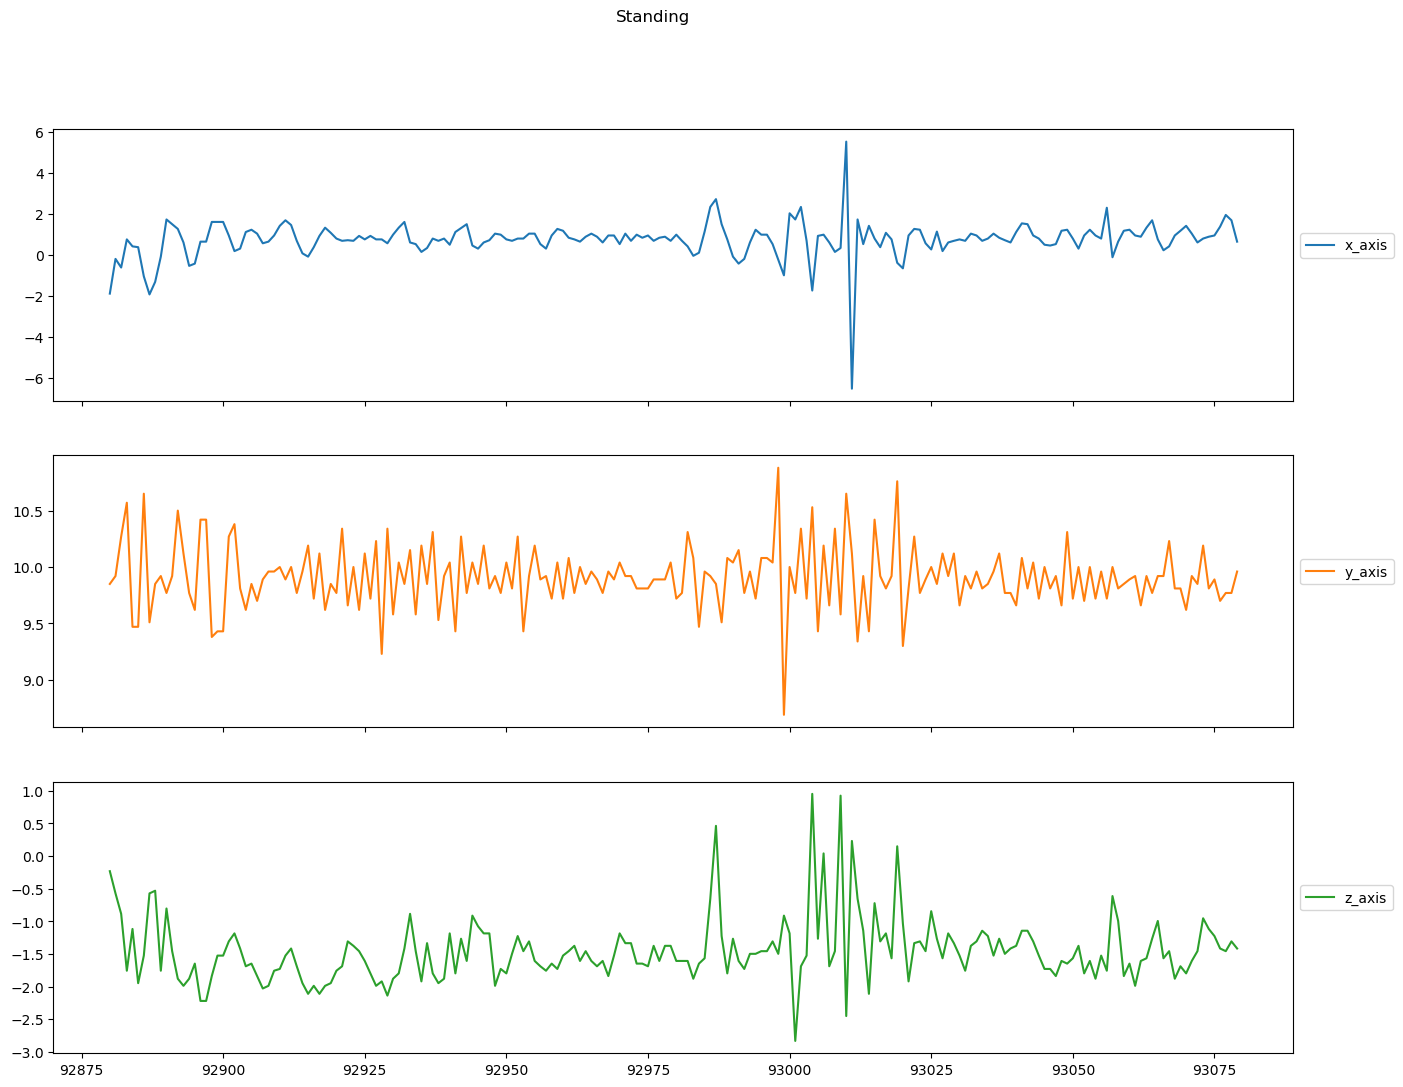

In [16]:
def plot_activity(activity, df):
    data = df[df["activity"] == activity][["x_axis", "y_axis", "z_axis"]][:200]
    axis = data.plot(subplots = True, figsize = (16, 12), title = activity)
    for ax in axis:
        ax.legend(loc = "lower left", bbox_to_anchor = (1.0, 0.5))

plot_activity("Standing", df)

In [17]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)
        ys.append(stats.mode(labels)[0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 200
STEP = 40

X_data, y_data = create_dataset(df[["x_axis", "y_axis", "z_axis"]], df.ActivityEncoded, TIME_STEPS,
                                  STEP)

X_train, X_test,y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, stratify=  y_data )
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size = 0.2, stratify=  y_train )
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(13577, 200, 3) (13577, 1)
(4243, 200, 3) (4243, 1)


In [18]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = "ignore", sparse_output = False)
enc = enc.fit(y_train)

y_train_hot = enc.transform(y_train)
y_test_hot = enc.transform(y_test)
y_val_hot = enc.transform(y_val)

print(X_train.shape, y_train_hot.shape, X_test.shape, y_test_hot.shape)

(13577, 200, 3) (13577, 2) (4243, 200, 3) (4243, 2)


In [19]:
#Epoch 100

BATCH_SIZE = 128

verbose,epochs,batch_size=1,10, BATCH_SIZE

n_timesteps,n_features,n_outputs= X_train.shape[1],X_train.shape[2],y_train_hot.shape[1]
n_timesteps,n_features,n_outputs

(200, 3, 2)

<h1>CNN 1</h1>

In [20]:
# Model 1
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 198, 64)           640       
                                                                 
 dropout (Dropout)           (None, 198, 64)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 99, 64)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6336)              0         
                                                                 
 dense (Dense)               (None, 128)               811136    
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                        

In [30]:
# validation_split = 0.1
batch_size = 128

train_epochs = 100
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/100
107/107 [==============================] - 1s 5ms/step - loss: 1.3357e-04 - accuracy: 1.0000 - val_loss: 0.0088 - val_accuracy: 0.9991
Epoch 2/100
107/107 [==============================] - 0s 3ms/step - loss: 1.2688e-04 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 0.9991
Epoch 3/100
107/107 [==============================] - 0s 3ms/step - loss: 1.2075e-04 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 0.9991
Epoch 4/100
107/107 [==============================] - 0s 3ms/step - loss: 1.1465e-04 - accuracy: 1.0000 - val_loss: 0.0086 - val_accuracy: 0.9991
Epoch 5/100
107/107 [==============================] - 0s 3ms/step - loss: 1.0963e-04 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 0.9991
Epoch 6/100
107/107 [==============================] - 0s 3ms/step - loss: 1.0361e-04 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 0.9991
Epoch 7/100
107/107 [==============================] - 0s 3ms/step - loss: 9.8473e-05 - accuracy: 1.0000 - val_loss: 0

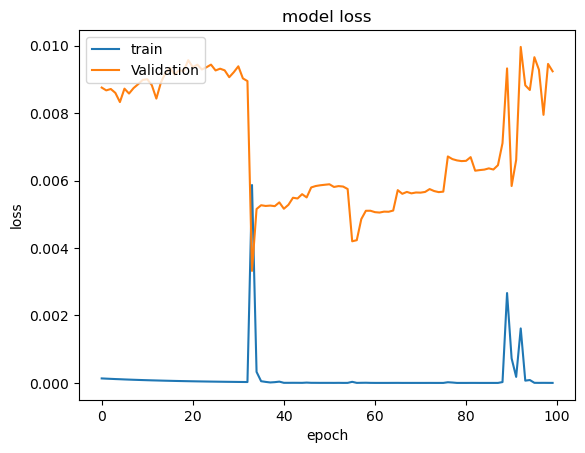

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

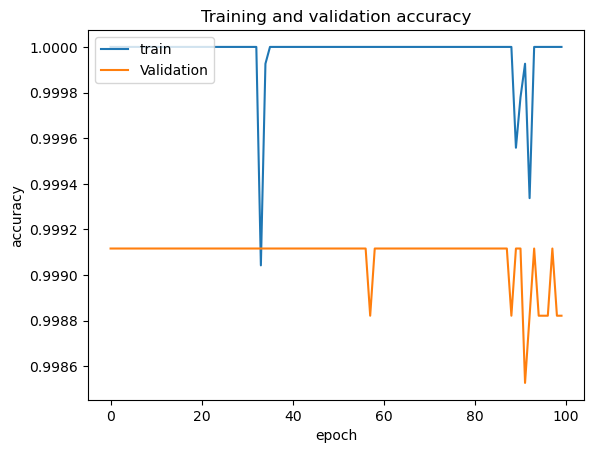

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

133/133 [==============================] - 0s 712us/step
f1_score =  0.999057269751662
0.999057270798963
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2122
           1       1.00      1.00      1.00      2121

    accuracy                           1.00      4243
   macro avg       1.00      1.00      1.00      4243
weighted avg       1.00      1.00      1.00      4243



<Axes: >

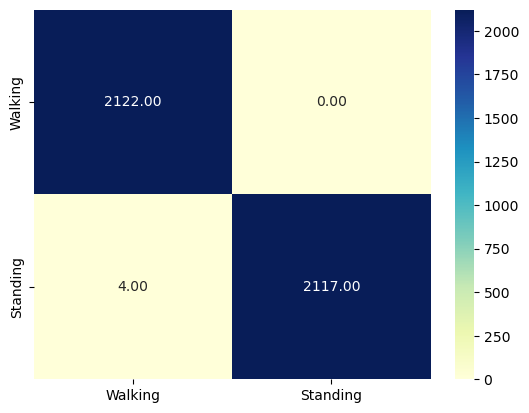

In [33]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking','Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_true, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

<h1>CNN 2</h1>

In [34]:
# Model 2
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 198, 64)           640       
                                                                 
 dropout_1 (Dropout)         (None, 198, 64)           0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 99, 64)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 97, 64)            12352     
                                                                 
 dropout_2 (Dropout)         (None, 97, 64)            0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 48, 64)           0         
 1D)                                                  

In [36]:
# validation_split = 0.1
batch_size = 128

train_epochs = 100
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/100
107/107 [==============================] - 1s 5ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0111 - val_accuracy: 0.9988
Epoch 2/100
107/107 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0096 - val_accuracy: 0.9988
Epoch 3/100
107/107 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.0108 - val_accuracy: 0.9982
Epoch 4/100
107/107 [==============================] - 0s 4ms/step - loss: 4.8727e-04 - accuracy: 0.9999 - val_loss: 0.0094 - val_accuracy: 0.9985
Epoch 5/100
107/107 [==============================] - 0s 4ms/step - loss: 8.7310e-04 - accuracy: 0.9997 - val_loss: 0.0109 - val_accuracy: 0.9982
Epoch 6/100
107/107 [==============================] - 0s 4ms/step - loss: 0.0034 - accuracy: 0.9990 - val_loss: 0.0133 - val_accuracy: 0.9985
Epoch 7/100
107/107 [==============================] - 0s 4ms/step - loss: 8.0958e-04 - accuracy: 0.9998 - val_loss: 0.0111 - val_accu

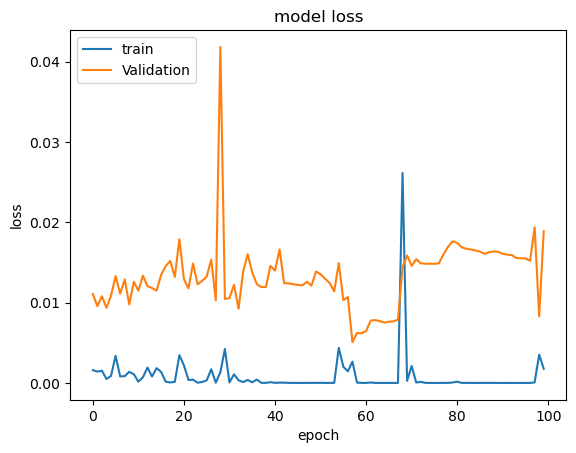

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

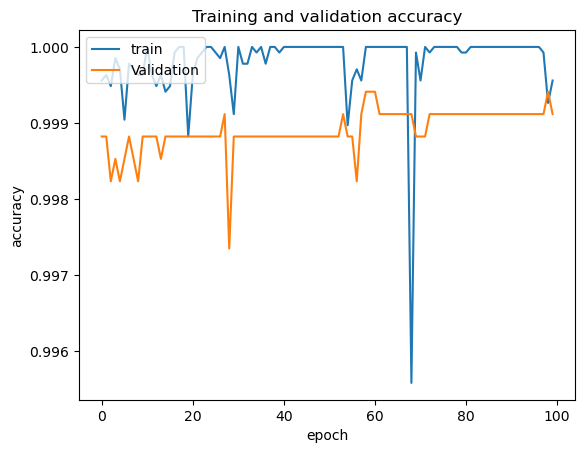

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

133/133 [==============================] - 0s 2ms/step
f1_score =  0.999057269751662
0.999057270798963
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2122
           1       1.00      1.00      1.00      2121

    accuracy                           1.00      4243
   macro avg       1.00      1.00      1.00      4243
weighted avg       1.00      1.00      1.00      4243



<Axes: >

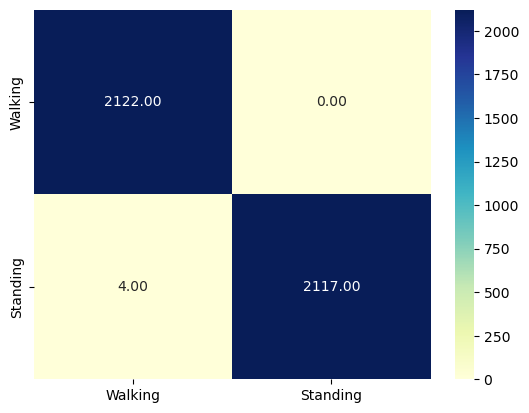

In [40]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking','Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_true, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

<h1>CNN 3</h1>

In [41]:
# Model 3
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 198, 64)           640       
                                                                 
 dropout_3 (Dropout)         (None, 198, 64)           0         
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 99, 64)           0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 97, 64)            12352     
                                                                 
 dropout_4 (Dropout)         (None, 97, 64)            0         
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 48, 64)           0         
 1D)                                                  

In [42]:
# validation_split = 0.1
batch_size = 128

train_epochs = 100
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/100
107/107 [==============================] - 1s 6ms/step - loss: 0.5759 - accuracy: 0.8732 - val_loss: 0.0479 - val_accuracy: 0.9862
Epoch 2/100
107/107 [==============================] - 0s 5ms/step - loss: 0.0166 - accuracy: 0.9943 - val_loss: 0.0256 - val_accuracy: 0.9959
Epoch 3/100
107/107 [==============================] - 0s 4ms/step - loss: 0.0118 - accuracy: 0.9962 - val_loss: 0.0235 - val_accuracy: 0.9953
Epoch 4/100
107/107 [==============================] - 0s 4ms/step - loss: 0.0062 - accuracy: 0.9982 - val_loss: 0.0102 - val_accuracy: 0.9982
Epoch 5/100
107/107 [==============================] - 0s 4ms/step - loss: 0.0078 - accuracy: 0.9978 - val_loss: 0.0151 - val_accuracy: 0.9973
Epoch 6/100
107/107 [==============================] - 0s 4ms/step - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.0075 - val_accuracy: 0.9985
Epoch 7/100
107/107 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.0059 - val_accuracy: 0.9988

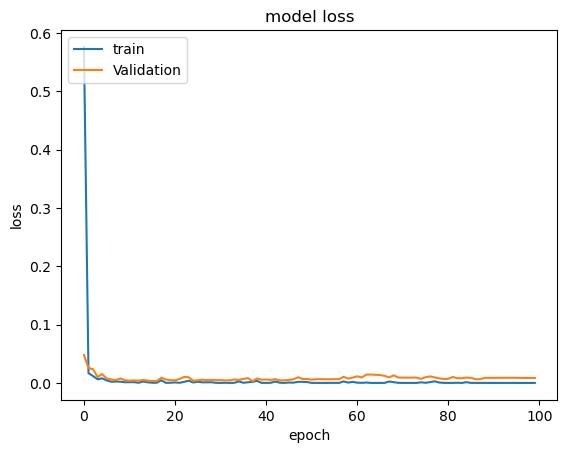

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

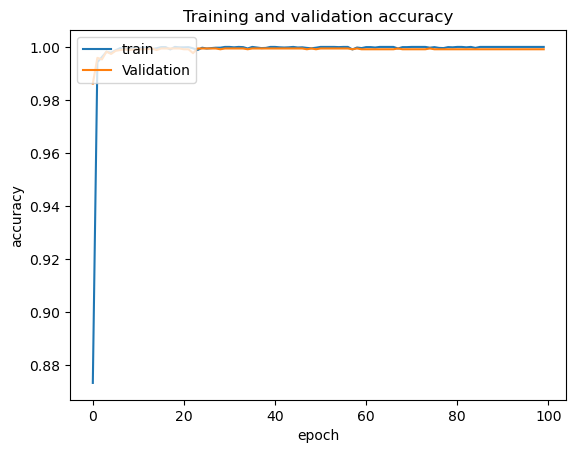

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

133/133 [==============================] - 0s 886us/step
f1_score =  0.999292952627937
0.9992929530992223
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2122
           1       1.00      1.00      1.00      2121

    accuracy                           1.00      4243
   macro avg       1.00      1.00      1.00      4243
weighted avg       1.00      1.00      1.00      4243



<Axes: >

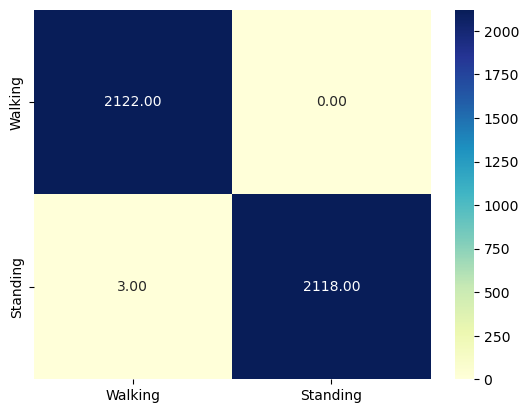

In [45]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking','Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_true, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')